In [1]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms with Python"
# by
# Chanchal Chatterjee
# December 2021
#
# Experiments for Chapter 5 - PCA Whitening example with MNIST data
#
# Author: Chanchal Chatterjee
#

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf


In [3]:
# Extract the number "9" from keras mnist dataset into array X[nDim, nSamples]

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# (unique, counts) = np.unique(y_train, return_counts=True)
# frequencies = np.asarray((unique, counts)).T
# print(frequencies)

X1 = np.zeros(shape=(1,784))
for i in range(x_train.shape[0]):
    if (y_train[i] == 9):
        X1 = np.vstack([X1, x_train[i].flatten()])
for i in range(x_test.shape[0]):
    if (y_test[i] == 9):
        X1 = np.vstack([X1, x_test[i].flatten()])
X = X1.T
X = np.delete(X,(0), axis=1)
X.shape

(784, 6958)

In [4]:
# Plot original images
# image_array is np.array(num_images, x_size, y_size)

import matplotlib.pyplot as plt

def plot_images(image_array):
    fig, axarr = plt.subplots(6, 4, figsize=(8, 12))
    for i in range(6):
        for j in range(4):
            #axarr[i,j].set_title('Image-'+str(4*i+j))
            img = np.reshape(image_array[:,4*i+j],(-1,28))
            axarr[i,j].imshow(img[:,:], cmap='gist_gray')

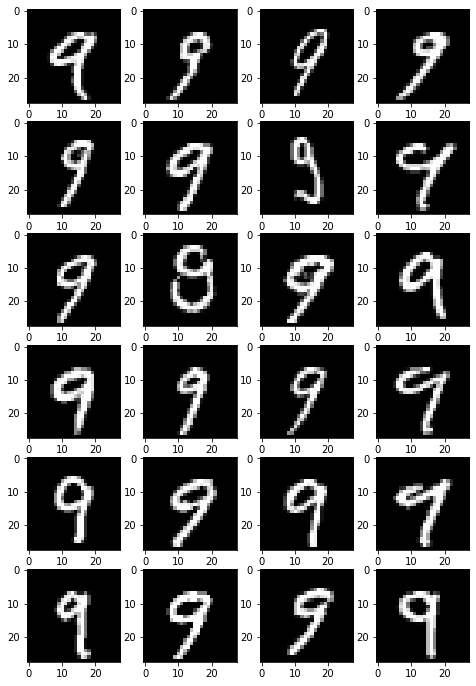

In [5]:
#Plot the original data
plot_images(X)

In [6]:
# Compute the first 100 principal components and PCA whiten the data
from scipy.linalg import eigh

nSamples = X.shape[1]
nDim = X.shape[0]
corX = (X @ X.T) / nSamples
eigvals, eigvecs = eigh(corX)
#print("eigvals =\n", eigvals[::-1])

V  = np.fliplr(eigvecs)
# D = np.zeros(shape=(nDim,nDim))
# for i in range(nDim):
#     if (i < 100):
#         D[i,i] = 1

# PCA Whitened data
# Y = V @ D @ V.T @ X
Y = V[:,:100] @ V[:,:100].T @ X


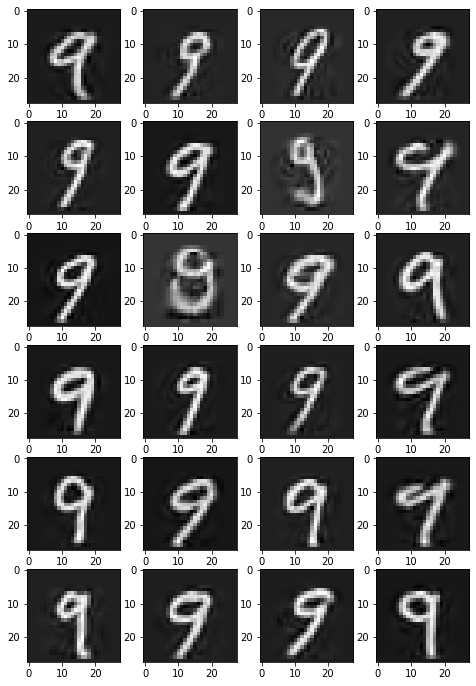

In [7]:
# Plot the PCA whitened data
plot_images(Y)


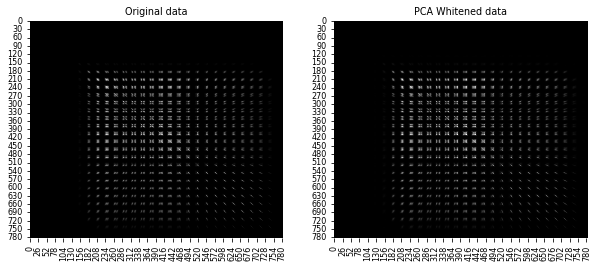

In [8]:
# Plot the EVD data
import seaborn as sns
corX = (X @ X.T)/nSamples
corY = (Y @ Y.T)/nSamples
plt.figure(figsize=(10, 4))
plt.rcParams.update({'font.size': 8})
plt.subplot(1, 2, 1)
#plt.imshow(corX, interpolation='nearest', cmap='RdBu')
sns.heatmap(corX, cmap='gray', cbar=False)
plt.title("Original data")
plt.subplot(1, 2, 2)
#plt.imshow(corY, interpolation='nearest', cmap='hot')
sns.heatmap(corY, cmap='gray', cbar=False)
plt.title("PCA Whitened data")
plt.show()

Text(0.5, 0.98, 'RECONSTRUCTED IMAGES')

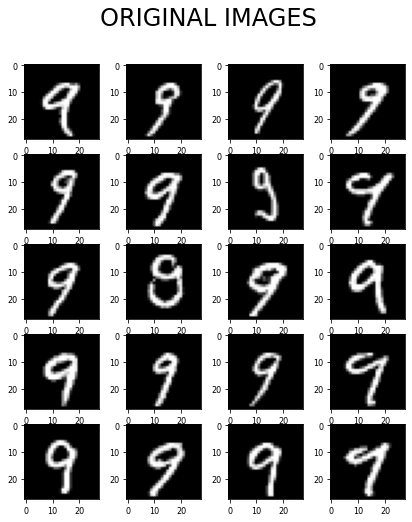

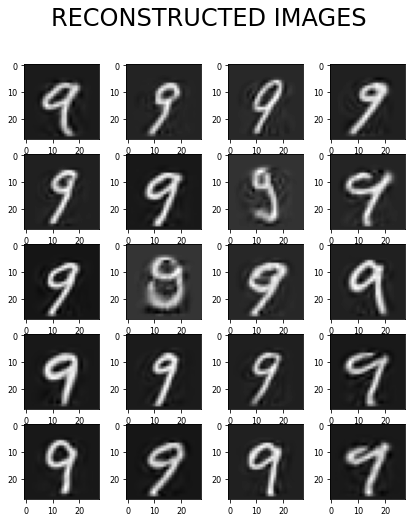

In [33]:
# Plot Figure 5.2
fig, axarr = plt.subplots(5, 4, figsize=(7,8))
for i in range(5):
    for j in range(4):
        #axarr[i,j].set_title('Image-'+str(4*i+j))
        img = np.reshape(X[:,4*i+j],(-1,28))
        axarr[i,j].imshow(img[:,:], cmap='gist_gray')
fig.suptitle('ORIGINAL IMAGES', fontsize=24)

fig, axarr = plt.subplots(5, 4, figsize=(7,8))
for i in range(5):
    for j in range(4):
        #axarr[i,j].set_title('Image-'+str(4*i+j))
        img = np.reshape(Y[:,4*i+j],(-1,28))
        axarr[i,j].imshow(img[:,:], cmap='gist_gray')
fig.suptitle('RECONSTRUCTED IMAGES', fontsize=24)